<a href="https://colab.research.google.com/github/agarciam980902/agarciam980902/blob/main/Robo_Trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Master in Applied Economics - Data Science for Economics**

# Group Assignment 1

In this case, we selected a well known set of companies which were analyzed and compared. In a real scenario, analyzing all hundred of thousends of public companies is not possible so we need to select a small set using some criteria.

Instead of choosing a company, we could think about choosing a market in which we would like to invest. The selection of a suitable market is a much easier problem and it could be done based on qualitative characteristics. In a second step, we only need to study some of the top players in that market to choose the company in which we will invest.

We also could think about other metrics which could help us having an idea about which is the best company to buy. For example, some companies give periodic dividends which could be considered in our RoboTrader. We could even think about using other company metrics which could give us useful information. Luckily, we can get all this information using yfinance. Here are some examples:



In [ ]:
# Install yfinace if necessary
!pip install -q yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
apple = yf.Ticker("AAPL")

In [ ]:
apple_info=apple.info
apple_info # Shows variable info (only works to get today's data)

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [ ]:
# Gets the quaterly income statement in the last year
df = apple.quarterly_income_stmt

df

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.21,0.21,0.159,0.158,0.21,NaN,NaN
Normalized EBITDA,45912000000.0,32502000000.0,28202000000.0,30736000000.0,43221000000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,36330000000.0,14736000000.0,21448000000.0,23636000000.0,33916000000.0,NaN,NaN
Reconciled Depreciation,3080000000.0,2911000000.0,2850000000.0,2836000000.0,2848000000.0,NaN,NaN
Reconciled Cost Of Revenue,66025000000.0,51051000000.0,46099000000.0,48482000000.0,64720000000.0,NaN,NaN
EBITDA,45912000000.0,32502000000.0,28202000000.0,30736000000.0,43221000000.0,NaN,NaN
EBIT,42832000000.0,29591000000.0,25352000000.0,27900000000.0,40373000000.0,NaN,NaN
Net Interest Income,NaN,NaN,NaN,NaN,NaN,-18000000.0,-18000000.0
Interest Expense,NaN,NaN,NaN,NaN,NaN,1002000000.0,998000000.0


In this assignment, your mission consists in choosing a market and a few companies in that market and analyze them in a similar way as the exercise performed in class.  

- Build a Robo Advisor similar to the one implemented in class.
- Analyze the behavour of the 'Volume' variable in relation with the price. Sometimes, there are some strong changes in the volume just before the price increases/decreases. How would you use this information to improve your trader?
- Combine some extra data with your conclusions. For example, analyze how the EPS evolved in the companies that performed well and compare to the companies that performed bad in the last year. Try to be original and use data from external sources!

In order to get more useful information, compare companies from the same country so you can skip extra problems that could appear such as currency convertion.

This project is graded with up to **5 pts** (5% of the final grade).

1. Robo trader \

We first do the tickers for the different companies we will be comparing. In this case we selected the semiconductor industry which has been the vogue for the last few years wihtin the stock market.

In this case we decided to investigate further into the investing decision in one of the most famous microconductor ETF's: *PHLX Semiconductor Sector*, better known as *SOX*. We are therefore going to analyze the different aspects that compose the stock performance of each of the companies followed and we will try to adapt the portfolio to a buy and sell strategy, changing the weight of each of the stocks weekly depending on their value.


Step 1) We create the tickers for all the companies and we then add all the stock information for the past 5 years for these companies. \

Additionally we will also add the current weights on each of the companies within this ETF.

In [ ]:
tickers_dict = {'NVIDIA': 'NVDA', 'Broadcom Inc.': 'AVGO', 'QUALCOMM Incorporated': 'QCOM', \
                'Advanced Micro Devices, Inc.': 'AMD', 'Texas Instruments Incorporated': 'TXN', \
                'Marvell Technology, Inc.': 'MRVL', 'KLA Corporation': 'KLAC', 'Lam Research Corporation': 'LRCX', \
                'Monolithic Power Systems, Inc.': 'MPWR', 'Applied Materials, Inc.': 'AMAT'}
tickers = list(tickers_dict.values())
raw_data = yf.download(tickers = list(tickers_dict.values()), period='5y')
raw_data.index = raw_data.index.tz_localize(None) # To ignore time zone
raw_data.head()

[*********************100%***********************]  10 of 10 completed


Price           Close                                               \
Ticker           AMAT        AMD       AVGO        KLAC       LRCX   
Date                                                                 
2020-02-14  63.798759  55.310001  27.585131  165.470108  23.794331   
2020-02-18  62.381859  56.889999  26.975735  158.852448  22.815342   
2020-02-19  64.535919  58.900002  27.404566  162.372452  23.412134   
2020-02-20  63.568981  57.270000  26.844646  157.816269  23.036247   
2020-02-21  61.529804  53.279999  26.433180  151.986588  22.216455   

Price                                                               ...  \
Ticker            MPWR       MRVL      NVDA       QCOM         TXN  ...   
Date                                                                ...   
2020-02-14  184.335037  24.529945  7.214505  80.198990  115.018837  ...   
2020-02-18  178.685135  24.207691  7.383296  78.793732  114.174980  ...   
2020-02-19  180.738754  24.617825  7.834654  81.058281  115.819214  ...   
2020-02-20  177.460648  24.539703  7.685282  80.082642  114.375076  ...   
2020-02-21  170.297073  23.856150  7.321057  77.898628  111.808662  ...   

Price         Volume                                                          \
Ticker          AMAT       AMD      AVGO     KLAC      LRCX    MPWR     MRVL   
Date                                                                           
2020-02-14   8104000  52365400  19137000   864800  11099000  321600  5264500   
2020-02-18  10208500  70133200  26693000  1778300  27494000  331300  6081400   
2020-02-19   8502600  58597300  20525000  1069300  15396000  285300  6274800   
2020-02-20   7535900  74203400  25521000  1664400  18878000  263900  5778000   
2020-02-21   9658100  88271100  24522000  1909900  21606000  318900  6709900   

Price                                      
Ticker            NVDA      QCOM      TXN  
Date                                       
2020-02-14  1041924000   6256500  2605200  
2020-02-18   620164000   7248100  3094400  
2020-02-19   694332000   7820900  3931600  
2020-02-20   810052000   9754900  2487800  
2020-02-21   768180000  12257600  4121000  

[5 rows x 50 columns]

In [ ]:
weights_dict = {'NVDA': 	7.49, 'AVGO': 	11.06, 'QCOM': 	6.65, 'AMD': 	6.25, \
                'TXN': 	5.62, 'MRVL': 4.76, 'KLAC': 4.61, 'LRCX': 4.44, 'MPWR': 4.14,\
                'AMAT': 4.11}

Step 2) We now cleanse the data to only have the closing price plus the volume traded. \

Additional to this we will also plot the closing price for each of the tickers and see how they have performed during the last 5 years. \

Probably we will have empty parts on the graph, therefore we weill additionally fill this information.

In [ ]:
key_data = raw_data[['Close', 'Volume']].asfreq('W-FRI')
key_data.head()

Price           Close                                               \
Ticker           AMAT        AMD       AVGO        KLAC       LRCX   
Date                                                                 
2020-02-14  63.798759  55.310001  27.585131  165.470108  23.794331   
2020-02-21  61.529804  53.279999  26.433180  151.986588  22.216455   
2020-02-28  55.642002  45.480000  23.665724  144.996628  20.577570   
2020-03-06  55.326077  48.590000  23.390541  146.854980  20.646294   
2020-03-13  48.720264  43.900002  20.332277  137.129410  18.358028   

Price                                                               \
Ticker            MPWR       MRVL      NVDA       QCOM         TXN   
Date                                                                 
2020-02-14  184.335037  24.529945  7.214505  80.198990  115.018837   
2020-02-21  170.297073  23.856150  7.321057  77.898628  111.808662   
2020-02-28  152.952072  20.799671  6.727585  70.084633   99.298477   
2020-03-06  160.106049  23.524137  6.627195  69.893311   98.445900   
2020-03-13  164.444672  20.291887  5.999450  68.395660   92.251709   

Price           Volume                                                  \
Ticker            AMAT          AMD        AVGO       KLAC        LRCX   
Date                                                                     
2020-02-14   8104000.0   52365400.0  19137000.0   864800.0  11099000.0   
2020-02-21   9658100.0   88271100.0  24522000.0  1909900.0  21606000.0   
2020-02-28  14943900.0  100331800.0  44586000.0  3695100.0  31956000.0   
2020-03-06   8958500.0  124590900.0  30169000.0  1858400.0  20486000.0   
2020-03-13  15539300.0   86689700.0  84714000.0  2804300.0  26920000.0   

Price                                                                   
Ticker          MPWR        MRVL          NVDA        QCOM         TXN  
Date                                                                    
2020-02-14  321600.0   5264500.0  1.041924e+09   6256500.0   2605200.0  
2020-02-21  318900.0   6709900.0  7.681800e+08  12257600.0   4121000.0  
2020-02-28  448100.0  23321800.0  1.133252e+09  20843300.0  11431100.0  
2020-03-06  391700.0  14684700.0  5.154120e+08  11536500.0   6386200.0  
2020-03-13  660800.0  12543800.0  6.348360e+08  15971400.0  16040100.0

In [ ]:
closing_prices = key_data['Close']
closing_prices = closing_prices.fillna(method = 'ffill')

<ipython-input-10-25cf9a1c949f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  closing_prices = closing_prices.fillna(method = 'ffill')


<Axes: xlabel='Date'>

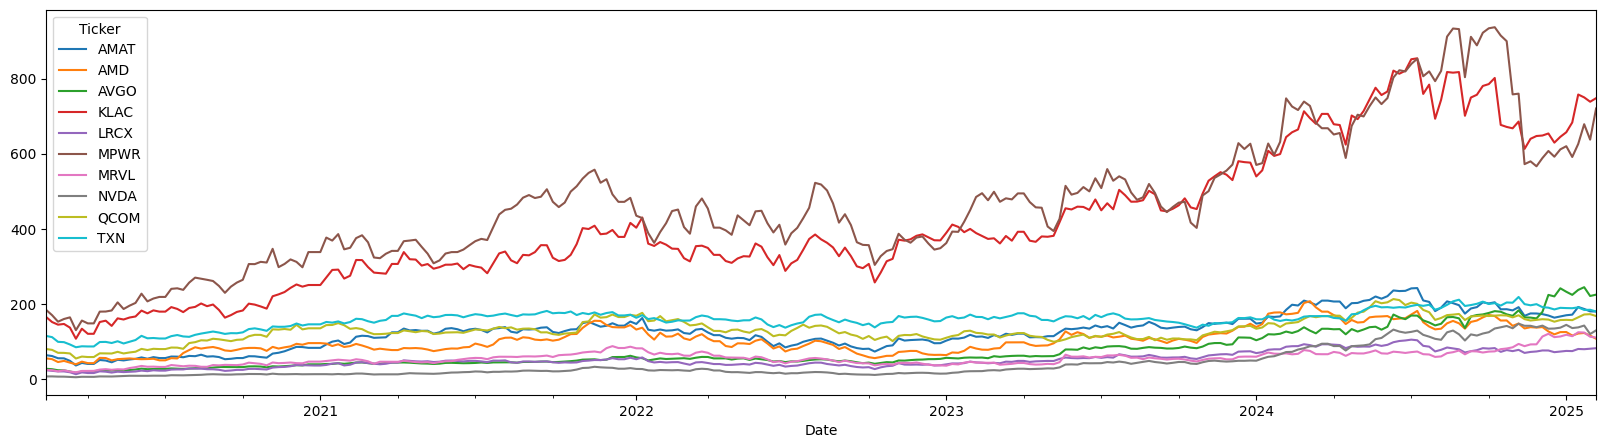

In [ ]:
closing_prices.to_csv('price.csv')
closing_prices.plot(figsize = (20,5))

In addition to plotting the closing prices of each of the stocks we must normalize them in order to be able to accurately compare them.

<Axes: xlabel='Date'>

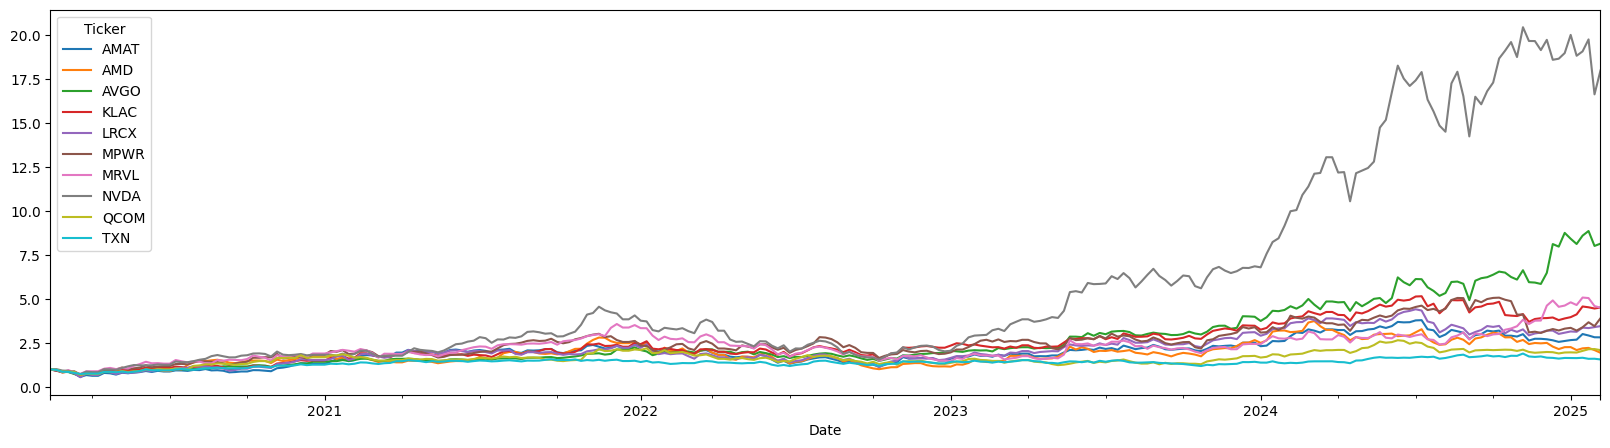

In [ ]:
norm_prices = closing_prices.divide(closing_prices.iloc[0])
norm_prices.plot(figsize = (20,5))

Step 3) After seeing an initial idea of the overall performance of the individual stocks, we plot how the overall index performs. \

We will also start to implement a buy & sell strategy depending on the overall mean of the stock at a certain moment. If the price of the stock is above that mean we will sell and if the price of the stock is below that mean we will buy.

<Axes: xlabel='Date'>

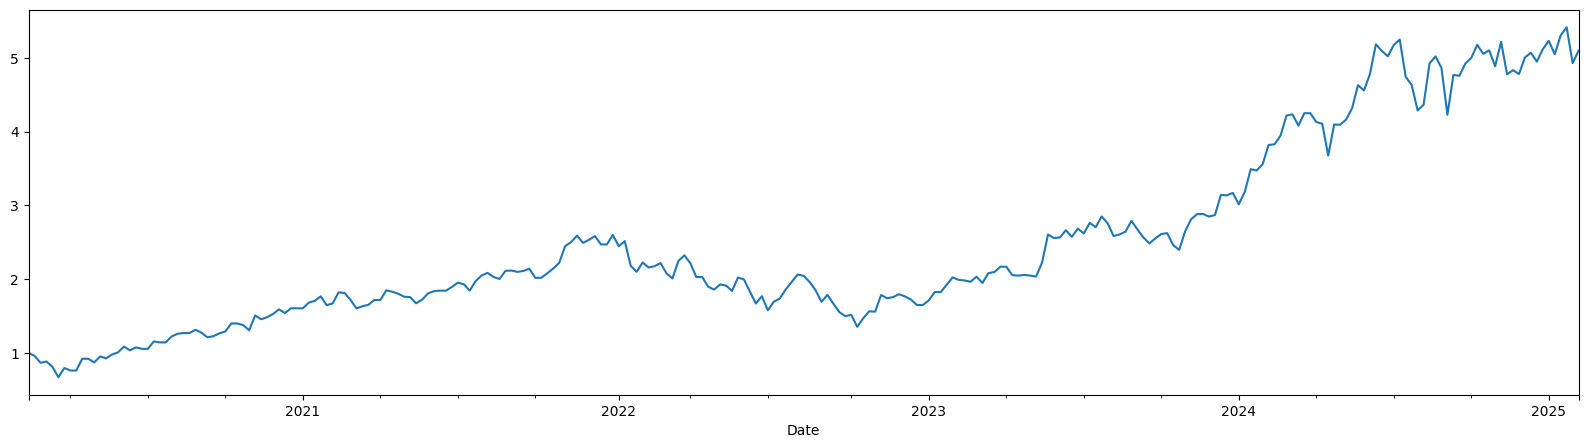

In [ ]:
norm_prices.mean(axis=1).plot(figsize = (20,5))

Mean-reversion strategy

In [ ]:
closing_prices_mov_av = closing_prices.rolling("90d").mean()
closing_prices_mov_av.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,63.798759,55.310001,27.585131,165.470108,23.794331,184.335037,24.529945,7.214505,80.198990,115.018837
2020-02-21,62.664282,54.295000,27.009155,158.728348,23.005393,177.316055,24.193048,7.267781,79.048809,113.413750
2020-02-28,60.323522,51.356667,25.894678,154.151108,22.196119,169.194728,23.061922,7.087716,76.060750,108.708659
2020-03-06,59.074161,50.665000,25.268644,152.327076,21.808662,166.922558,23.177476,6.972586,74.518890,106.142969
2020-03-13,57.003381,49.312000,24.281371,149.287543,21.118536,166.426981,22.600358,6.777959,73.294244,103.364717


We showcase here the current performance of the ETF

<Axes: title={'center': 'SOX Performance'}, xlabel='Date', ylabel='Weighted Normalized Price'>

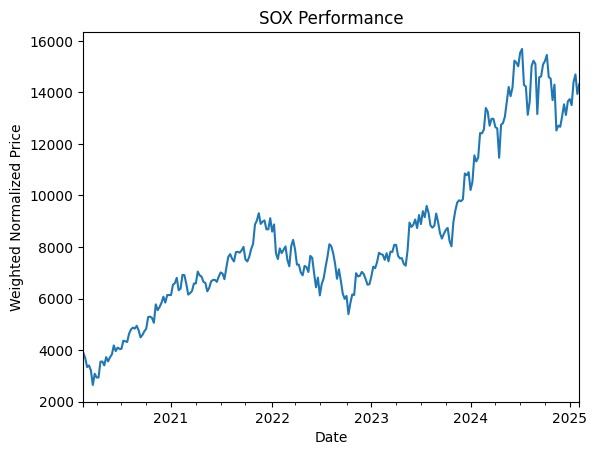

In [ ]:
SOX_performance_weighted = (closing_prices * pd.Series(weights_dict)).sum(axis=1)
plt.title('SOX Performance')
plt.xlabel('Date')
plt.ylabel('Weighted Normalized Price')
plt.grid(True)
SOX_performance_weighted.plot()

Here we showcase an example of how the buying and selling strategy would work by selling when the stock is above the mean or buying when the stock is below its mean.

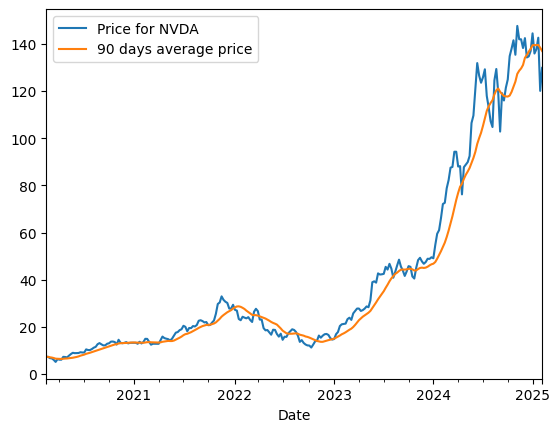

In [ ]:
fig, ax = plt.subplots()
ax = closing_prices['NVDA'].plot(ax=ax, label="Price for NVDA")
closing_prices_mov_av['NVDA'].plot(ax = ax, label="90 days average price")
plt.legend()

Data frame explaining if the prices are under (1) or overpriced (0) for 5 years, in weekly intervals each friday.

In [ ]:
df_signal_price = (closing_prices_mov_av > closing_prices).astype(int)
df_signal_price.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,0,0,0,0,0,0,0,0,0,0
2020-02-21,1,1,1,1,1,1,1,0,1,1
2020-02-28,1,1,1,1,1,1,1,1,1,1
2020-03-06,1,1,1,1,1,1,0,1,1,1
2020-03-13,1,1,1,1,1,1,1,1,1,1


On each of these fridays depending on the value of the stocks, we decide to buy different amounts of the stocks.

These leads to create a portfolio that has different weights weekly depending on performance of the stock.

In [ ]:
 # For each day we compute the number of stocks we buy as the sum
number_orders_buy_each_day = df_signal_price.sum(axis=1)

# Dividing by that value we get the weights for each stock in the portfolio
df_weights_price = df_signal_price.divide(number_orders_buy_each_day, axis = 0)
df_weights_price.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111
2020-02-28,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2020-03-06,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111
2020-03-13,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


We then calculate the daily percentage changes in closing prices for the stocks.

In [ ]:
returns = closing_prices.pct_change().fillna(0)
returns.head(6)

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-21,-0.035564,-0.036702,-0.041760,-0.081486,-0.066313,-0.076155,-0.027468,0.014769,-0.028683,-0.027910
2020-02-28,-0.095690,-0.146396,-0.104696,-0.045991,-0.073769,-0.101851,-0.128121,-0.081064,-0.100310,-0.111889
2020-03-06,-0.005678,0.068382,-0.011628,0.012817,0.003340,0.046773,0.130986,-0.014922,-0.002730,-0.008586
2020-03-13,-0.119398,-0.096522,-0.130748,-0.066226,-0.110832,0.027098,-0.137401,-0.094723,-0.021428,-0.062920
2020-03-20,-0.253488,-0.097722,-0.165369,-0.215657,-0.282260,-0.207200,-0.101540,-0.145698,-0.196544,-0.079593


In [ ]:
returns_week = returns.loc["2024-02-16"]
returns_week

,2024-02-16
Ticker,
AMAT,0.073881
AMD,0.008059
AVGO,-0.029577
KLAC,0.020037
LRCX,0.015852
MPWR,-0.028991
MRVL,-0.036903
NVDA,0.006654
QCOM,0.011192


We must also see for the specific date, how much of our budget we will allocate for each of the stocks depending if the stock was undervalued compared to its mean.

In [ ]:
budget_allocation = df_weights_price.loc["2024-02-16"]
budget_allocation

,2024-02-16
Ticker,
AMAT,0.0
AMD,0.0
AVGO,0.0
KLAC,0.0
LRCX,0.0
MPWR,0.0
MRVL,0.0
NVDA,0.0
QCOM,0.0


Finally we multiply the budget allocation times the percentage change on the stock's value. As we can see on 2024/02/16 our portfolio is losing money by -1.2%

In [ ]:
(budget_allocation * returns_week).sum()

-0.012438436361082994

In [ ]:
returns.loc["2024-07-19"]

,2024-07-19
Ticker,
AMAT,-0.136154
AMD,-0.165354
AVGO,-0.074776
KLAC,-0.110957
LRCX,-0.142744
MPWR,-0.054741
MRVL,-0.096209
NVDA,-0.087512
QCOM,-0.080126


In [ ]:
budget_allocation = df_weights_price.loc["2024-07-19"]
budget_allocation

,2024-07-19
Ticker,
AMAT,0.166667
AMD,0.166667
AVGO,0.000000
KLAC,0.166667
LRCX,0.166667
MPWR,0.000000
MRVL,0.166667
NVDA,0.000000
QCOM,0.166667


In [ ]:
(budget_allocation * returns_week).sum()

0.015352893699835649

The last 3 lines of code show an example in which we get a positive increase of 1.5% on our portfolio & a better distributed exposure to different companies.

As part of our experimentation process, we wanted to improve our budget allocation by trying to distribute the budget not equally but rather depending on how beneficial the underpricing of the stock was.

In [ ]:
opportunity_score = closing_prices_mov_av - closing_prices
opportunity_score[opportunity_score < 0] = 0
df_weights_opp_price = opportunity_score.divide(opportunity_score.sum(axis=1), axis=0).fillna(0)

In [ ]:
new_budget_allocation = df_weights_opp_price.loc["2024-07-19"]
new_budget_allocation

,2024-07-19
Ticker,
AMAT,0.206246
AMD,0.189118
AVGO,0.000000
KLAC,0.263403
LRCX,0.088059
MPWR,0.000000
MRVL,0.071201
NVDA,0.000000
QCOM,0.181973


In [ ]:
(new_budget_allocation * returns_week).sum()

0.022844491885146995

As we can see, compared to the previous code, we now get a 2.2% increase for the portfolio instead of the previous 1.5% on 2024/07/19.

We are now able to visually see the returns on our portfolio.

In [ ]:
portfolio_returns = (returns * df_weights_opp_price.shift(1)).sum(axis=1)
portfolio_returns.head()

,0
Date,
2020-02-14,0.000000
2020-02-21,0.000000
2020-02-28,-0.085369
2020-03-06,0.024660
2020-03-13,-0.053695


In [ ]:
portfolio_price = (1 + portfolio_returns).cumprod()
portfolio_price.head()

,0
Date,
2020-02-14,1.000000
2020-02-21,1.000000
2020-02-28,0.914631
2020-03-06,0.937186
2020-03-13,0.886864


In [ ]:
portfolio_price.loc['2024-07-19']

6.171646941244608

<Axes: xlabel='Date'>

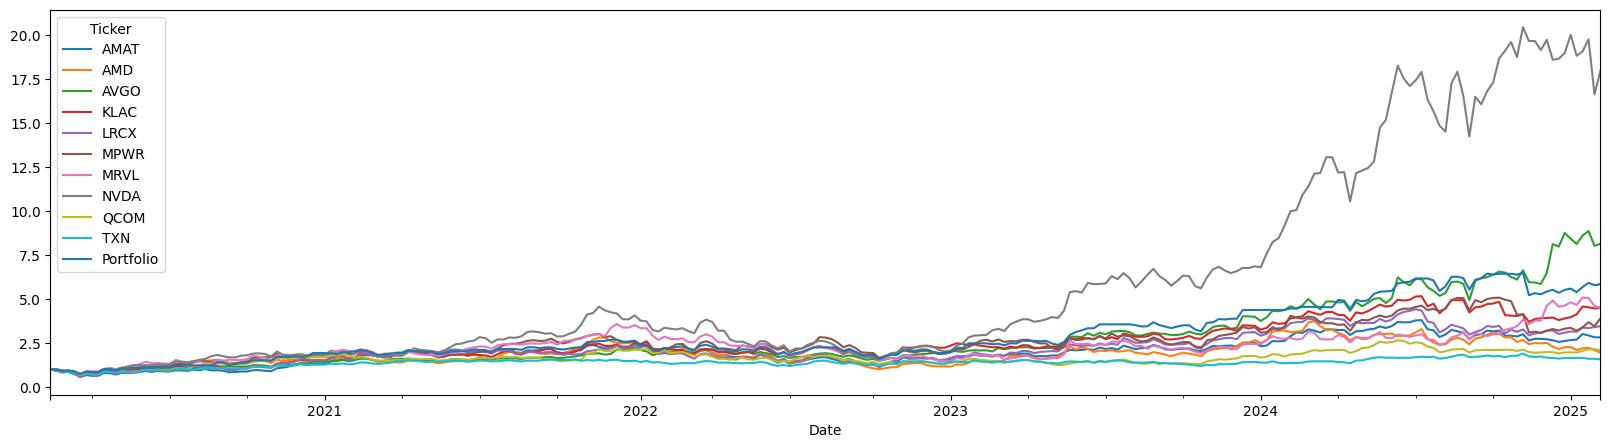

In [ ]:
norm_prices['Portfolio'] = portfolio_price
norm_prices.plot(figsize = (20, 5))

2. Volume & Price Analysis\
We are now interested into seeing how we can improve our Robo-Investor by including information about volume in the trading of our stocks when we make investment decisions.

Understanding the impact of trading volume is crucial in market analysis. By analyzing volume trends, we can identify potential opportunities to optimize buy and sell decisions. A stock may be considered overvalued when trading volume reaches a peak, signaling a potential selling opportunity. Conversely, an undervalued stock may present a buying opportunity when trading volume reaches its lowest levels.

In [ ]:
volume_data = raw_data['Volume'].asfreq('W-FRI')
volume_data.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,8104000.0,52365400.0,19137000.0,864800.0,11099000.0,321600.0,5264500.0,1.041924e+09,6256500.0,2605200.0
2020-02-21,9658100.0,88271100.0,24522000.0,1909900.0,21606000.0,318900.0,6709900.0,7.681800e+08,12257600.0,4121000.0
2020-02-28,14943900.0,100331800.0,44586000.0,3695100.0,31956000.0,448100.0,23321800.0,1.133252e+09,20843300.0,11431100.0
2020-03-06,8958500.0,124590900.0,30169000.0,1858400.0,20486000.0,391700.0,14684700.0,5.154120e+08,11536500.0,6386200.0
2020-03-13,15539300.0,86689700.0,84714000.0,2804300.0,26920000.0,660800.0,12543800.0,6.348360e+08,15971400.0,16040100.0


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming volume_data is your Pandas DataFrame
fig = px.line(volume_data, x=volume_data.index, y=volume_data.columns, title='Volume Data')
fig.show()


In [ ]:
norm_volume = volume_data.divide(volume_data.iloc[0])

import plotly.express as px
import pandas as pd

# Assuming volume_data is your Pandas DataFrame
fig = px.line(norm_volume, x=norm_volume.index, y=norm_volume.columns, title='Volume Data')
fig.show()


<Axes: xlabel='Date'>

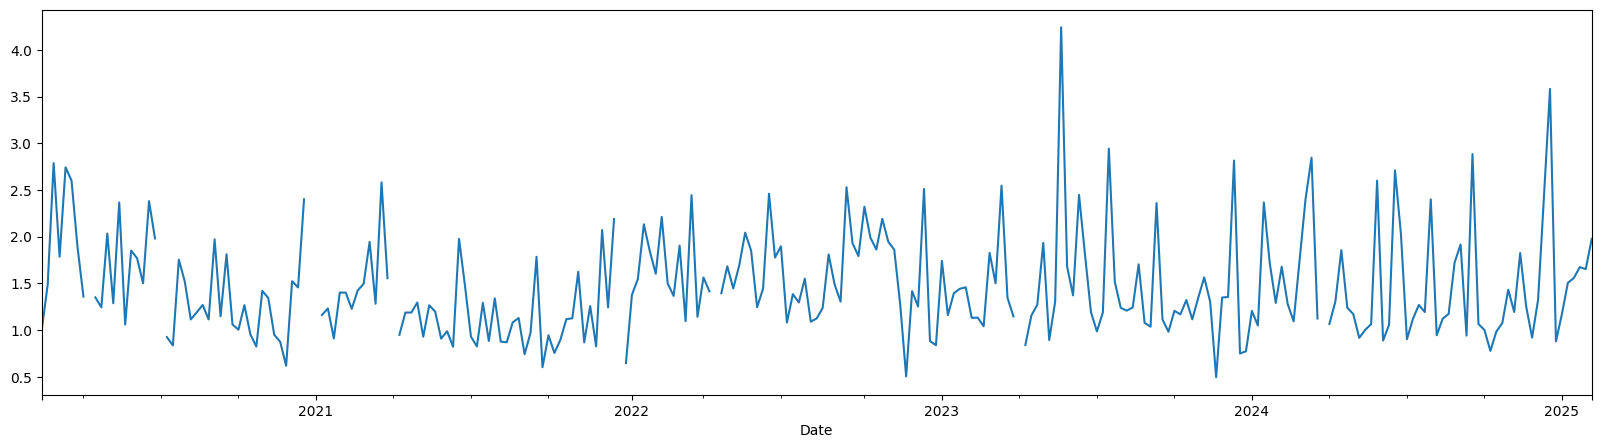

In [ ]:
norm_volume.mean(axis=1).plot(figsize = (20,5))

In [ ]:
volume_data_mov_av = volume_data.rolling("90d").mean()
volume_data_mov_av.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,8104000.0,5.236540e+07,19137000.0,864800.0,1.109900e+07,321600.000000,5264500.0,1.041924e+09,6.256500e+06,2.605200e+06
2020-02-21,8881050.0,7.031825e+07,21829500.0,1387350.0,1.635250e+07,320250.000000,5987200.0,9.050520e+08,9.257050e+06,3.363100e+06
2020-02-28,10902000.0,8.032277e+07,29415000.0,2156600.0,2.155367e+07,362866.666667,11765400.0,9.811187e+08,1.311913e+07,6.052433e+06
2020-03-06,10416125.0,9.138980e+07,29603500.0,2082050.0,2.128675e+07,370075.000000,12495225.0,8.646920e+08,1.272348e+07,6.135875e+06
2020-03-13,11440760.0,9.044978e+07,40625600.0,2226500.0,2.241340e+07,428220.000000,12504940.0,8.187208e+08,1.337306e+07,8.116720e+06


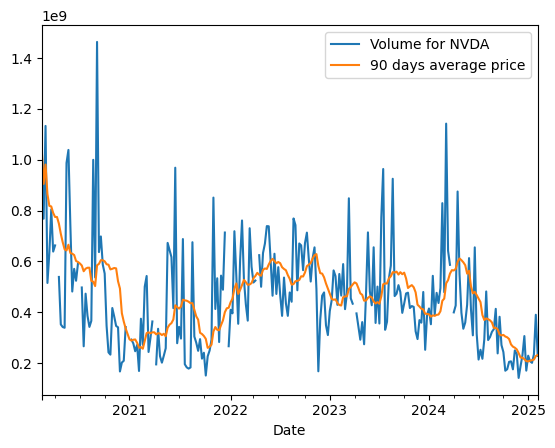

In [ ]:
fig, ax = plt.subplots()
ax = volume_data['NVDA'].plot(ax=ax, label="Volume for NVDA")
volume_data_mov_av['NVDA'].plot(ax = ax, label="90 days average price")
plt.legend()

Going through the same process we went with the closing prices of stocks, we are able to see the data around volume. \

Understanding this we should now be able to take the data into account when creating our portfolio.

In [ ]:
df_signal_volume = (volume_data_mov_av > volume_data).astype(int)
df_signal_volume.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,0,0,0,0,0,0,0,0,0,0
2020-02-21,0,0,0,0,0,1,0,1,0,0
2020-02-28,0,0,0,0,0,0,0,0,0,0
2020-03-06,1,0,0,1,1,0,0,1,1,0
2020-03-13,0,1,0,0,0,0,0,1,0,0


Now when having this information, in order to determine to which of the two variables to give more weight, we will see how volatile are these two variables.

In [ ]:
price_volatility = closing_prices.pct_change().std() * np.sqrt(252)
volume_volatility = volume_data.pct_change().std() * np.sqrt(252)
price_weight = 1 - (price_volatility / (price_volatility + volume_volatility))
volume_weight = 1 - price_weight

<ipython-input-40-7eb927469619>:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [ ]:
combined_signal = price_weight * df_signal_price + volume_weight * df_signal_volume
combined_signal_binary = (combined_signal > 0.5).astype(int)
combined_signal_binary.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,0,0,0,0,0,0,0,0,0,0
2020-02-21,1,1,1,1,1,1,1,0,1,1
2020-02-28,1,1,1,1,1,1,1,1,1,1
2020-03-06,1,1,1,1,1,1,0,1,1,1
2020-03-13,1,1,1,1,1,1,1,1,1,1


In [ ]:
 # For each day we compute the number of stocks we buy as the sum
number_orders_buy_each_day_2 = combined_signal_binary.sum(axis=1)

# Dividing by that value we get the weights for each stock in the portfolio
df_weights_combined = combined_signal_binary.divide(number_orders_buy_each_day_2, axis = 0)
df_weights_combined.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111
2020-02-28,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2020-03-06,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111
2020-03-13,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [ ]:
returns.head()

Ticker,AMAT,AMD,AVGO,KLAC,LRCX,MPWR,MRVL,NVDA,QCOM,TXN
Date,,,,,,,,,,
2020-02-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-21,-0.035564,-0.036702,-0.041760,-0.081486,-0.066313,-0.076155,-0.027468,0.014769,-0.028683,-0.027910
2020-02-28,-0.095690,-0.146396,-0.104696,-0.045991,-0.073769,-0.101851,-0.128121,-0.081064,-0.100310,-0.111889
2020-03-06,-0.005678,0.068382,-0.011628,0.012817,0.003340,0.046773,0.130986,-0.014922,-0.002730,-0.008586
2020-03-13,-0.119398,-0.096522,-0.130748,-0.066226,-0.110832,0.027098,-0.137401,-0.094723,-0.021428,-0.062920


In [ ]:
budget_allocation_volxprice = df_weights_combined.loc["2024-07-19"]
budget_allocation_volxprice

,2024-07-19
Ticker,
AMAT,0.166667
AMD,0.166667
AVGO,0.000000
KLAC,0.166667
LRCX,0.166667
MPWR,0.000000
MRVL,0.166667
NVDA,0.000000
QCOM,0.166667


In [ ]:
(budget_allocation_volxprice * returns_week).sum()

0.015352893699835649

In [ ]:
portfolio_returns_volxprice = (returns * df_weights_combined.shift(1)).sum(axis=1)
portfolio_returns.head()

,0
Date,
2020-02-14,0.000000
2020-02-21,0.000000
2020-02-28,-0.085369
2020-03-06,0.024660
2020-03-13,-0.053695


In [ ]:
portfolio_volxprice = (1 + portfolio_returns).cumprod()
portfolio_volxprice.head()

,0
Date,
2020-02-14,1.000000
2020-02-21,1.000000
2020-02-28,0.914631
2020-03-06,0.937186
2020-03-13,0.886864


In [ ]:
portfolio_volxprice.loc['2024-07-19']

6.171646941244608

<ipython-input-49-f179e78664a5>:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



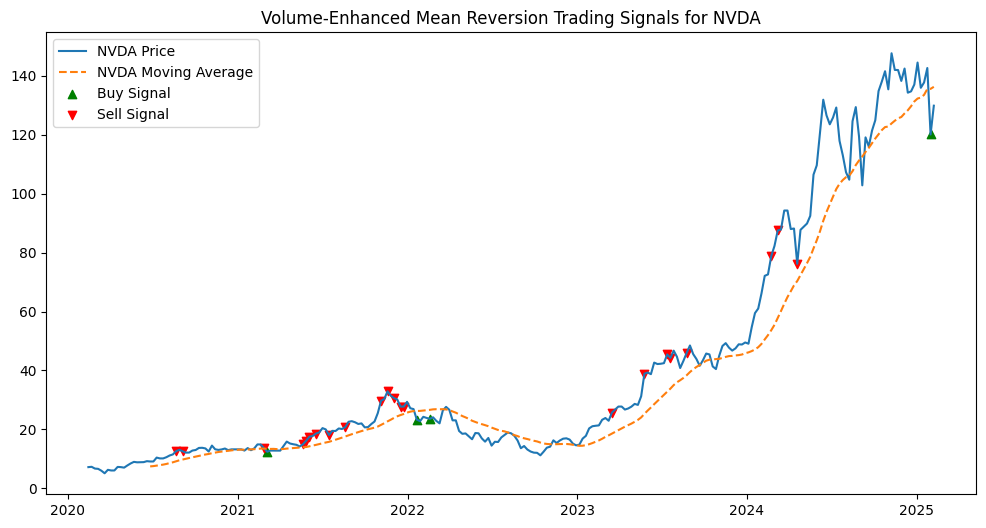

In [ ]:
# Create the dataframe for the strategy
data = raw_data[['Close', 'Volume']].asfreq('w-fri').fillna(method='ffill')
# Define strategy parameters (same as before)
window = 20
volume_threshold = 1.5

# Compute moving average and volume mean
rolling_mean = data['Close'].rolling(window=window).mean()
rolling_vol_mean = data['Volume'].rolling(window=window).mean()

# Detect volume spikes
volume_spikes = data['Volume'] > (rolling_vol_mean * volume_threshold)
# Generate trading signals
signals = pd.DataFrame(index=data.index)
for ticker in tickers:
    signals[f'{ticker}_Buy'] = (data['Close'][ticker] < rolling_mean[ticker]) & volume_spikes[ticker]
    signals[f'{ticker}_Sell'] = (data['Close'][ticker] > rolling_mean[ticker]) & volume_spikes[ticker]

# Plotting function (modified to use tickers)
def plot_signals(ticker):
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'][ticker], label=f'{ticker} Price')
    plt.plot(rolling_mean[ticker], label=f'{ticker} Moving Average', linestyle='dashed')
    buy_signals = data['Close'][ticker][signals[f'{ticker}_Buy']]
    sell_signals = data['Close'][ticker][signals[f'{ticker}_Sell']]
    plt.scatter(buy_signals.index, buy_signals, label='Buy Signal', marker='^', color='green', alpha=1)
    plt.scatter(sell_signals.index, sell_signals, label='Sell Signal', marker='v', color='red', alpha=1)
    plt.legend()
    plt.title(f'Volume-Enhanced Mean Reversion Trading Signals for {ticker}')
    plt.show()

# Example usage: plot for NVDA stock
ticker_example = tickers[0]
plot_signals(ticker_example)


Combine some extra data with your conclusions. For example, analyze how the EPS evolved in the companies that performed well and compare to the companies that performed bad in the last year. Try to be original and use data from external sources!

We want to improve our algorithm even more by adding extra data to our analysis. In this case we have decided to take into account three metrics that we think could help us improve it further. These are:



*   ROE: Will allow us to have a better idea of the expected returns on equity for each of the companies.
*   ROA: will allow us to shows how efficiently a company uses its assets to generate profit
*   EPS: Will allow us to know how many earnings we can expect per every share bought.
*   Quality of Income: Will allow us to know how well is the company doing in terms of its cash flows and obligations.




**ROE - Return on Equity**

In [ ]:
# Create a Ticker for each company

NVDA = yf.Ticker("NVDA")
AVGO = yf.Ticker("AVGO")
QCOM = yf.Ticker("QCOM")
AMD = yf.Ticker("AMD")
TXN = yf.Ticker("TXN")
MRVL = yf.Ticker("MRVL")
KLAC = yf.Ticker("KLAC")
MPWR = yf.Ticker("MPWR")
AMAT = yf.Ticker("AMAT")

In [ ]:
# Retrieve the information for each company

NVDA_info=NVDA.info
AVGO_info=AVGO.info
QCOM_info=QCOM.info
AMD_info=AMD.info
TXN_info=TXN.info
MRVL_info=MRVL.info
KLAC_info=KLAC.info
MPWR_info=MPWR.info
AMAT_info=AMAT.info

In [ ]:
income_statement_NVDA = NVDA.quarterly_income_stmt
balance_sheet_NVDA = NVDA.quarterly_balance_sheet

income_statement_AVGO = AVGO.quarterly_income_stmt
balance_sheet_AVGO = AVGO.quarterly_balance_sheet

income_statement_QCOM = QCOM.quarterly_income_stmt
balance_sheet_QCOM = QCOM.quarterly_balance_sheet

income_statement_AMD = AMD.quarterly_income_stmt
balance_sheet_AMD = AMD.quarterly_balance_sheet

income_statement_TXN = TXN.quarterly_income_stmt
balance_sheet_TXN = TXN.quarterly_balance_sheet

income_statement_MRVL = MRVL.quarterly_income_stmt
balance_sheet_MRVL = MRVL.quarterly_balance_sheet

income_statement_KLAC = KLAC.quarterly_income_stmt
balance_sheet_NVDA = NVDA.quarterly_balance_sheet

income_statement_MPWR = MPWR.quarterly_income_stmt
balance_sheet_MPWR = MPWR.quarterly_balance_sheet

income_statement_AMAT = AMAT.quarterly_income_stmt
balance_sheet_AMAT = AMAT.quarterly_balance_sheet

Available Columns: Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 'Restructuring And Merge

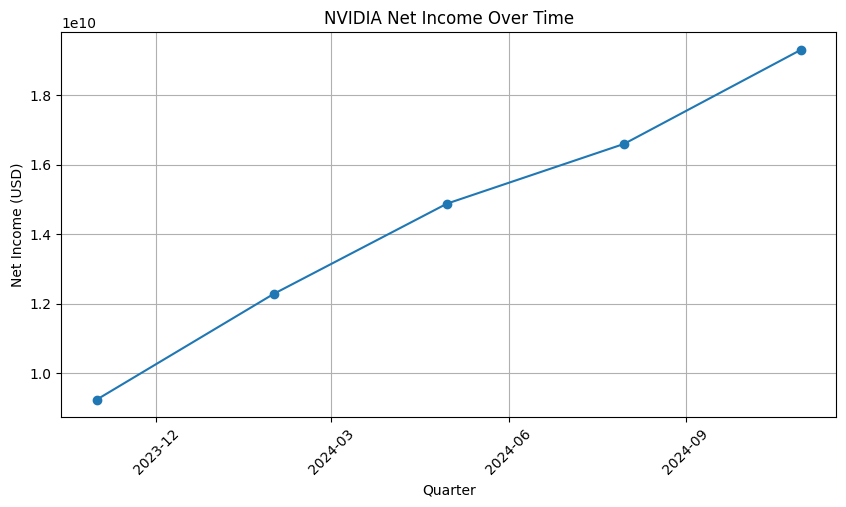

Final Extracted Net Income Data:
2023-07-31             NaN
2023-10-31    9.243000e+09
2024-01-31    1.228500e+10
2024-04-30    1.488100e+10
2024-07-31    1.659900e+10
2024-10-31    1.930900e+10
Name: Net Income From Continuing Operation Net Minority Interest, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Transpose data frame
income_statement_NVDA = income_statement_NVDA.T

#Clean Column Names (Remove Extra Spaces)
income_statement_NVDA.columns = income_statement_NVDA.columns.str.strip()

# Find Exact Match for "Net Income"
print("Available Columns:", income_statement_NVDA.columns)  # Check column names
possible_matches = [col for col in income_statement_NVDA.columns if "Net Income" in col]
print("Possible Matches:", possible_matches)

# Extract Net Income (by using the Best Match)
if possible_matches:
    net_income_NVDA = income_statement_NVDA[possible_matches[0]]
else:
    raise ValueError("No column matching 'Net Income' found!")

# Formatting index properly
if not isinstance(income_statement_NVDA.index, pd.DatetimeIndex):
    income_statement_NVDA = income_statement_NVDA.reset_index()

#Convert Net Income Values to Numeric
net_income_NVDA = pd.to_numeric(net_income_NVDA, errors='coerce')


# Plot Net Income Trend

plt.figure(figsize=(10,5))
plt.plot(net_income_NVDA.index, net_income_NVDA.values, marker='o', linestyle='-')

plt.xlabel("Quarter")
plt.ylabel("Net Income (USD)")
plt.title("NVIDIA Net Income Over Time")
plt.grid(True)

# Format date labels for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # YYYY-MM format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months

plt.show()

# Final Processed Data
net_income_NVDA = net_income_NVDA.sort_index()
net_income_NVDA = net_income_NVDA.interpolate(method="linear")  # Fill missing values
print("Final Extracted Net Income Data:")
print(net_income_NVDA)


In [ ]:
import pandas as pd
import yfinance as yf

# Create an empty dictionary for storing ROE data
roe_data = {}

# List of tickers
tickers_dict = {'NVIDIA': 'NVDA', 'Apple': 'AAPL', 'Microsoft': 'MSFT'}
tickers = list(tickers_dict.values())

# Fetch ROE for each ticker
for ticker in tickers:
    company = yf.Ticker(ticker)

    # Check if 'returnOnEquity' exists in the info dictionary
    if 'returnOnEquity' in company.info:
        roe_data[ticker] = company.info['returnOnEquity']
    else:
        print(f"Warning: 'returnOnEquity' not found for {ticker}")
        roe_data[ticker] = None  # Assign NaN or None for missing values

# Convert to DataFrame
roe_df = pd.DataFrame(roe_data, index=['ROE']).T  # Transpose for readability

# Display the DataFrame
print(roe_df.head(10))


          ROE
NVDA  1.23767
AAPL  1.57413
MSFT  0.35604


In [ ]:
# Assuming closing_prices DataFrame is defined earlier
last_year_returns = closing_prices.iloc[-252:].pct_change().fillna(0)  # Returns for the last year
avg_returns = last_year_returns.mean()

well_performing = avg_returns[avg_returns > avg_returns.mean()].index
poor_performing = avg_returns[avg_returns < avg_returns.mean()].index

In [ ]:
well_performing_roe = roe_df[roe_df.index.isin(well_performing)]['ROE'].mean()
poor_performing_roe = roe_df[roe_df.index.isin(poor_performing)]['ROE'].mean()

print(f"Average ROE for well-performing companies: {well_performing_roe:.2f}")
print(f"Average ROE for poor-performing companies: {poor_performing_roe:.2f}")

Average ROE for well-performing companies: 1.24
Average ROE for poor-performing companies: nan


In [ ]:
buy_roe_threshold = 0.15  # Buy if ROE is above this value
sell_roe_threshold = 0.10  # Sell if ROE is below this value
roe_df = pd.DataFrame()
tickers = list(tickers_dict.values())
roe_data = {}
for ticker in tickers:
    company = yf.Ticker(ticker)
    roe_data[ticker] = company.info['returnOnEquity']  # Access ROE from yfinance info

roe_df = pd.DataFrame(roe_data, index=['ROE'])
roe_df = roe_df.transpose()  # Transpose for easier analysis
roe_df.head(10)
def generate_roe_signals(roe_df, buy_threshold, sell_threshold):
    """Generates buy and sell signals based on ROE.

    Args:
        roe_df: DataFrame containing ROE data for stocks.
        buy_threshold: ROE value above which to generate a buy signal.
        sell_threshold: ROE value below which to generate a sell signal.

    Returns:
        DataFrame with buy and sell signals (1 for buy, -1 for sell, 0 for hold).
    """

    signals = pd.DataFrame(index=roe_df.index)
    signals['signal'] = 0  # Initialize with hold signal

    signals.loc[roe_df['ROE'] > buy_threshold, 'signal'] = 1  # Buy signal
    signals.loc[roe_df['ROE'] < sell_threshold, 'signal'] = -1  # Sell signal

    return signals

signals = generate_roe_signals(roe_df, buy_roe_threshold, sell_roe_threshold)
print(signals)

      signal
NVDA       1
AAPL       1
MSFT       1


**EPS - Earnings Per Share**

In [ ]:
import yfinance as yf
import pandas as pd

tickers_dict = {'NVIDIA': 'NVDA', 'Broadcom Inc.': 'AVGO', 'QUALCOMM Incorporated': 'QCOM', \
                'Advanced Micro Devices, Inc.': 'AMD', 'Texas Instruments Incorporated': 'TXN', \
                'Marvell Technology, Inc.': 'MRVL', 'KLA Corporation': 'KLAC', 'Lam Research Corporation': 'LRCX', \
                'Monolithic Power Systems, Inc.': 'MPWR', 'Applied Materials, Inc.': 'AMAT'}
tickers = list(tickers_dict.values())

eps_data = {}
for ticker in tickers:
    company = yf.Ticker(ticker)
    try:
        # Try to get EPS from company.info['trailingEps']
        eps = company.info['trailingEps']
        eps_data[ticker] = eps
    except (KeyError, TypeError):
        try:
            # If not found, try to get EPS from company.earnings
            earnings_data = company.earnings
            if earnings_data is not None and not earnings_data.empty:
                eps = earnings_data['Earnings'].iloc[-1]
                eps_data[ticker] = eps
            else:
                print(f"Earnings data not available for {ticker}")
                eps_data[ticker] = None
        except (KeyError, TypeError, IndexError):
            print(f"Earnings data not available for {ticker}")
            eps_data[ticker] = None

eps_df = pd.DataFrame(eps_data, index=['EPS']).T  # Create a DataFrame
eps_df.head(10)

,EPS
NVDA,2.53
AVGO,1.30
QCOM,9.26
AMD,1.00
TXN,5.21
MRVL,-1.70
KLAC,23.77
LRCX,3.29
MPWR,36.61
AMAT,8.61


In [ ]:
well_performing_eps = eps_df[eps_df.index.isin(well_performing)]['EPS'].mean()
poor_performing_eps = eps_df[eps_df.index.isin(poor_performing)]['EPS'].mean()

print(f"Average EPS for well-performing companies: {well_performing_eps:.2f}")
print(f"Average EPS for poor-performing companies: {poor_performing_eps:.2f}")

Average EPS for well-performing companies: 12.50
Average EPS for poor-performing companies: 5.47


**QoI - Quality of Income**

In [ ]:
quality_of_income_data = {}

for ticker in tickers:
    company = yf.Ticker(ticker)
    try:
        # Get cash flow and income statement data using more general keys
        cashflow_statement = company.cashflow
        income_statement = company.financials

        # Extract relevant values, handling potential variations in keys
        cash_from_operations = cashflow_statement.loc[cashflow_statement.index.str.contains('Operating Activities'), cashflow_statement.columns[0]]
        net_income = income_statement.loc[income_statement.index.str.contains('Net Income'), income_statement.columns[0]]

        # Convert to numeric values (if needed)
        cash_from_operations = pd.to_numeric(cash_from_operations, errors='coerce').values[0]
        net_income = pd.to_numeric(net_income, errors='coerce').values[0]

        # Calculate Quality of Income
        if net_income != 0:  # Avoid division by zero
            quality_of_income = cash_from_operations / net_income
            quality_of_income_data[ticker] = quality_of_income
        else:
            quality_of_income_data[ticker] = None  # Handle cases where net income is zero
    except (KeyError, TypeError, IndexError, AttributeError) as e:
        print(f"Quality of Income data not available for {ticker}: {e}")
        quality_of_income_data[ticker] = None  # Handle missing or invalid data

# Create a DataFrame
quality_of_income_df = pd.DataFrame(quality_of_income_data, index=['Quality of Income']).T


In [ ]:
quality_of_income_df.head(10)

,Quality of Income
NVDA,0.943884
AVGO,3.236381
QCOM,-0.009001
AMD,1.853138
TXN,0.986175
MRVL,-1.468288
KLAC,1.197936
LRCX,1.215399
MPWR,1.493336
AMAT,1.209001


In [ ]:
# Define threshold (e.g., median Quality of Income)
median_qoi = quality_of_income_df["Quality of Income"].median()

# Classify companies
well_performing = quality_of_income_df[quality_of_income_df["Quality of Income"] >= median_qoi].index.tolist()
poor_performing = quality_of_income_df[quality_of_income_df["Quality of Income"] < median_qoi].index.tolist()

# Compute mean QoI for well-performing and poor-performing companies
well_performing_qoi = quality_of_income_df.loc[well_performing, 'Quality of Income'].mean()
poor_performing_qoi = quality_of_income_df.loc[poor_performing, 'Quality of Income'].mean()

# Print formatted results
print(f"Average QoI for well-performing companies: {well_performing_qoi:.2f}")
print(f"Average QoI for poor-performing companies: {poor_performing_qoi:.2f}")


Average QoI for well-performing companies: 1.80
Average QoI for poor-performing companies: 0.33


In [ ]:
# Assuming quality_of_income_df, well_performing_qoi, and poor_performing_qoi are defined
def generate_qoi_signals(quality_of_income_df, well_performing_qoi, poor_performing_qoi):
    """Generates buy and sell signals based on Quality of Income (QoI).

    Args:
        quality_of_income_df: DataFrame containing QoI data for stocks.
        well_performing_qoi: Average QoI of well-performing stocks.
        poor_performing_qoi: Average QoI of poor-performing stocks.

    Returns:
        DataFrame with buy and sell signals (1 for buy, -1 for sell, 0 for hold).
    """

    signals = pd.DataFrame(index=quality_of_income_df.index)
    signals['signal'] = 0  # Initialize with hold signal

    # Buy signal if QoI is above the average of well-performing stocks
    signals.loc[quality_of_income_df['Quality of Income'] > well_performing_qoi, 'signal'] = 1

    # Sell signal if QoI is below the average of poor-performing stocks
    signals.loc[quality_of_income_df['Quality of Income'] < poor_performing_qoi, 'signal'] = -1

    return signals

# Generate signals
qoi_signals = generate_qoi_signals(quality_of_income_df, well_performing_qoi, poor_performing_qoi)

# Print the signals
print(qoi_signals)

      signal
NVDA       0
AVGO       1
QCOM      -1
AMD        1
TXN        0
MRVL      -1
KLAC       0
LRCX       0
MPWR       0
AMAT       0


In [ ]:
for ticker in tickers_dict.values():
    if ticker in qoi_signals.index:
        signal = qoi_signals.loc[ticker, 'signal']
        if signal == 1:
            print(f"Buy signal for {ticker}")
        elif signal == -1:
            print(f"Sell signal for {ticker}")
        else:
            print(f"Hold signal for {ticker}")
    else:
        print(f"QoI data not available for {ticker}")

Hold signal for NVDA
Buy signal for AVGO
Sell signal for QCOM
Buy signal for AMD
Hold signal for TXN
Sell signal for MRVL
Hold signal for KLAC
Hold signal for LRCX
Hold signal for MPWR
Hold signal for AMAT


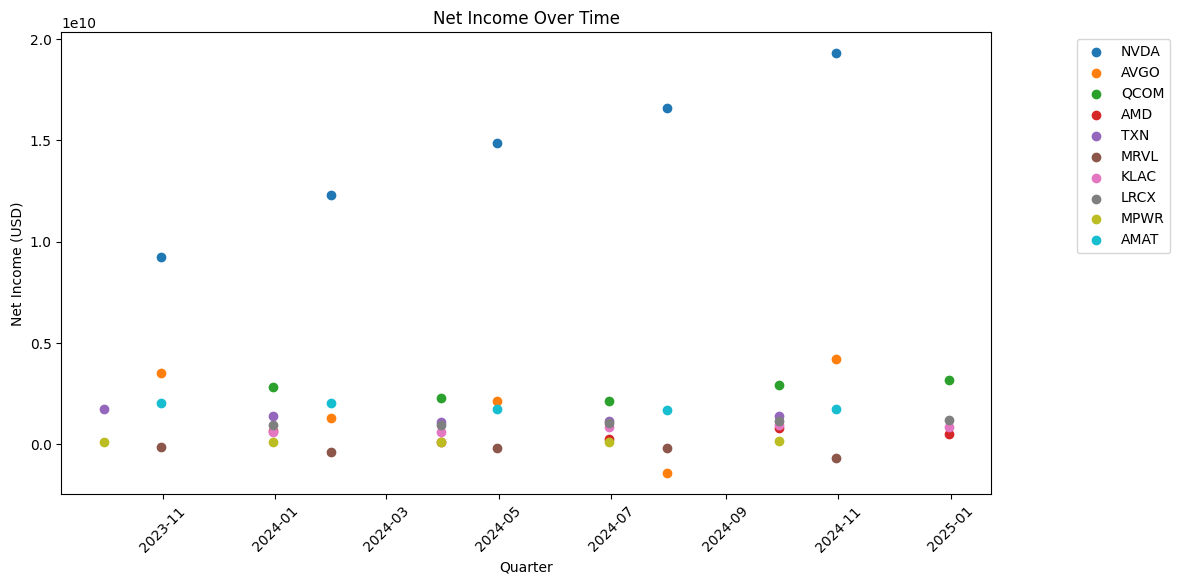

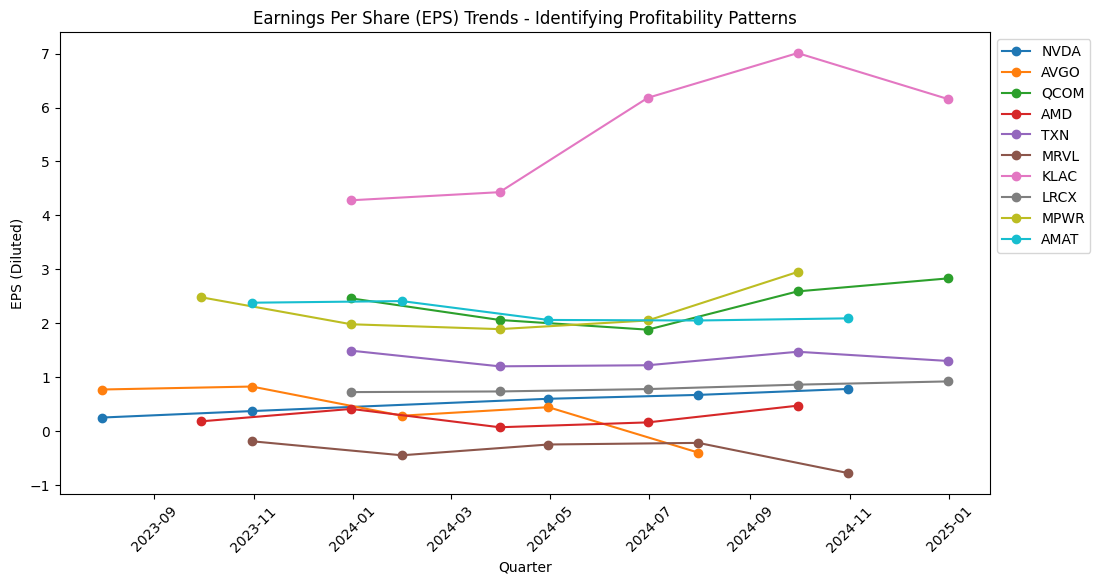


📉 Yearly Stock Returns (%):
NVDA: 85.21%
AVGO: 84.00%
QCOM: 14.11%
AMD: -35.98%
TXN: 18.93%
MRVL: 45.93%
KLAC: 16.39%
LRCX: -4.68%
MPWR: -6.57%
AMAT: -5.60%


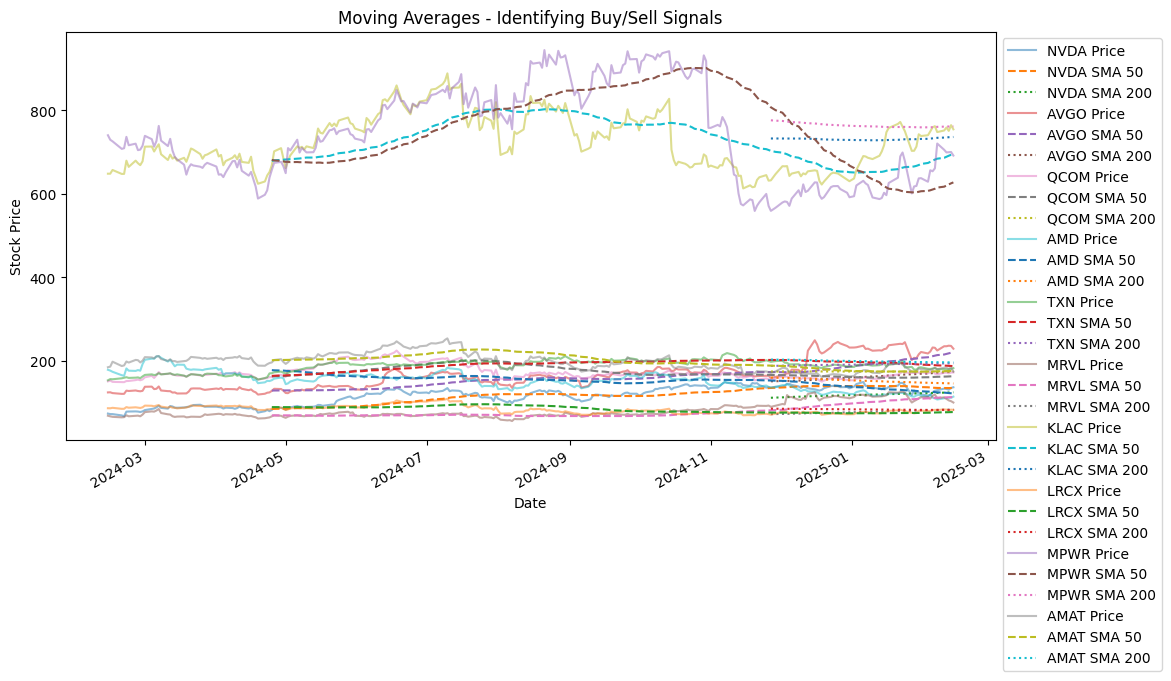

In [ ]:
# Install necessary libraries
!pip install -q yfinance pandas matplotlib numpy

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the dictionary of companies and tickers
tickers_dict = {
    'NVIDIA': 'NVDA', 'Broadcom Inc.': 'AVGO', 'QUALCOMM Incorporated': 'QCOM',
    'Advanced Micro Devices, Inc.': 'AMD', 'Texas Instruments Incorporated': 'TXN',
    'Marvell Technology, Inc.': 'MRVL', 'KLA Corporation': 'KLAC',
    'Lam Research Corporation': 'LRCX', 'Monolithic Power Systems, Inc.': 'MPWR',
    'Applied Materials, Inc.': 'AMAT'
}

# Get list of tickers
companies = list(tickers_dict.values())

# ----------------------------- STEP 1: Fetch Stock Data -----------------------------

stock_data = {}

for ticker in companies:
    stock = yf.Ticker(ticker)
    stock_data[ticker] = {
        "info": stock.info,
        "history": stock.history(period="1y"),
        "income_stmt": stock.quarterly_income_stmt
    }

# ----------------------------- STEP 2: Net Income Over Time -----------------------------

plt.figure(figsize=(12, 6))

for ticker in companies:
    df = stock_data[ticker]["income_stmt"]

    # Find the correct "Net Income" column
    net_income_cols = [col for col in df.index if "Net Income" in col]
    if net_income_cols:
        net_income_series = df.loc[net_income_cols[0]].dropna()
        plt.scatter(net_income_series.index, net_income_series.values, label=ticker)

plt.xlabel("Quarter")
plt.ylabel("Net Income (USD)")
plt.title("Net Income Over Time")
plt.xticks(rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

# ----------------------------- STEP 3: Earnings Per Share (EPS) Trends -----------------------------

plt.figure(figsize=(12, 6))

for ticker in companies:
    df = stock_data[ticker]["income_stmt"]

    if "Diluted EPS" in df.index:
        eps_series = df.loc["Diluted EPS"].dropna()
        plt.plot(eps_series.index, eps_series.values, marker="o", label=ticker)

plt.xlabel("Quarter")
plt.ylabel("EPS (Diluted)")
plt.title("Earnings Per Share (EPS) Trends - Identifying Profitability Patterns")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# ----------------------------- STEP 4: Stock Performance Comparison -----------------------------

stock_returns = {}

for ticker in companies:
    df = stock_data[ticker]["history"]

    if "Close" in df.columns and not df.empty:
        stock_returns[ticker] = ((df["Close"].iloc[-1] - df["Close"].iloc[0]) / df["Close"].iloc[0]) * 100

print("\n📉 Yearly Stock Returns (%):")
for ticker, ret in stock_returns.items():
    print(f"{ticker}: {ret:.2f}%")

# ----------------------------- STEP 5: Moving Averages & Trading Signals -----------------------------

moving_averages = {}

for ticker in companies:
    df = stock_data[ticker]["history"]

    if "Close" in df.columns and not df.empty:
        df["SMA_50"] = df["Close"].rolling(window=50).mean()
        df["SMA_200"] = df["Close"].rolling(window=200).mean()
        moving_averages[ticker] = df

plt.figure(figsize=(12, 6))

for ticker in companies:
    df = moving_averages.get(ticker, None)

    if df is not None and "SMA_50" in df.columns:
        df["Close"].plot(label=f"{ticker} Price", alpha=0.5)
        df["SMA_50"].plot(label=f"{ticker} SMA 50", linestyle="--")
        df["SMA_200"].plot(label=f"{ticker} SMA 200", linestyle=":")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Moving Averages - Identifying Buy/Sell Signals")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

📊 Stock Volatility (Annualized %):
NVDA: 56.78%
AVGO: 56.96%
QCOM: 37.73%
AMD: 46.88%
TXN: 28.67%
MRVL: 60.78%
KLAC: 42.86%
LRCX: 43.94%
MPWR: 54.23%
AMAT: 42.61%


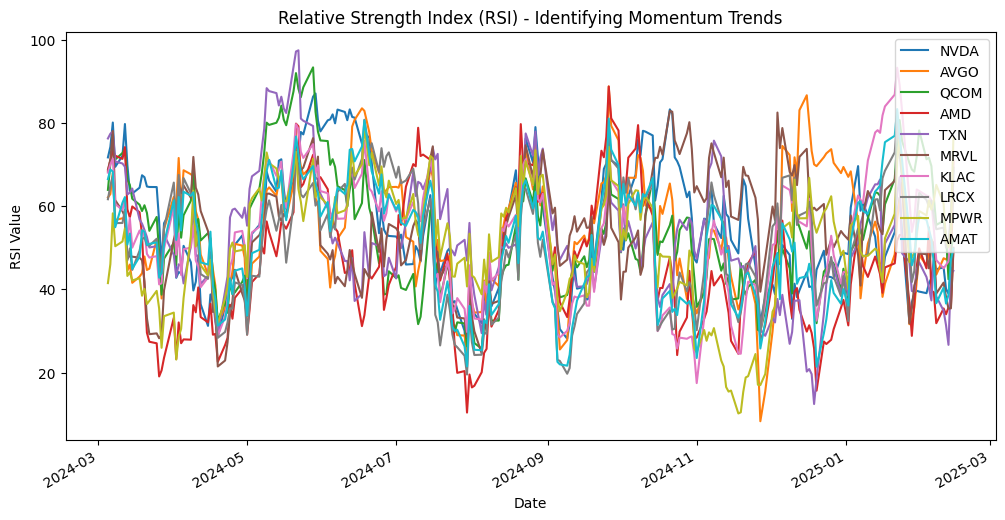

In [ ]:


# ---------------------------- STEP 7: Volatility Analysis ----------------------------
volatility = {}
for ticker in companies:
    df = stock_data[ticker]["history"]
    df["Daily Return"] = df["Close"].pct_change()
    volatility[ticker] = df["Daily Return"].std() * np.sqrt(252) * 100  # Annualized volatility

print("📊 Stock Volatility (Annualized %):")
for ticker, vol in volatility.items():
    print(f"{ticker}: {vol:.2f}%")

# ---------------------------- STEP 8: Implementing RSI for Momentum Analysis ----------------------------
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

rsi_values = {}
for ticker in companies:
    df = stock_data[ticker]["history"]
    df["RSI"] = compute_RSI(df)
    rsi_values[ticker] = df["RSI"]

plt.figure(figsize=(12, 6))
for ticker, rsi_series in rsi_values.items():
    rsi_series.plot(label=ticker)

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI) - Identifying Momentum Trends")
plt.legend()
plt.show()

In [ ]:
# -------------------------- STEP 9: RoboTrader Stock Recommendation --------------------------
selected_stocks = []

for ticker in companies:
    if ticker in eps_trends:  # Ensure eps_trends contains the ticker key
        eps_series = eps_trends[ticker].dropna()  # Remove NaNs first

        if not eps_series.empty:
            avg_eps_growth = eps_series.pct_change().mean()  # Compute mean EPS growth

            # Ensure RSI and volatility are correctly calculated before using them
            latest_rsi = rsi_values.get(ticker, pd.Series([100])).iloc[-1]  # Default RSI = 100 if missing
            stock_volatility = volatility.get(ticker, 50)  # Default Volatility = 50 if missing

            # Stock selection criteria
            if avg_eps_growth > 0 and stock_returns.get(ticker, 0) > 0 and stock_volatility < 40:
                if latest_rsi < 70:  # RSI below 70 means not overbought
                    selected_stocks.append(ticker)

# Final Recommendation Output
print("\n✅ Recommended stocks based on EPS growth, trading volume, RSI, and risk assessment:", selected_stocks)



✅ Recommended stocks based on EPS growth, trading volume, RSI, and risk assessment: ['TXN']


<ipython-input-82-d577378cb683>:9: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

